In [287]:
pip install --upgrade scikit-learn

   ---------------------------------------- 11.2/11.2 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
python.exe -m pip install --upgrade pip

In [331]:
import sklearn
print(sklearn.__version__)


1.6.0


In [332]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    precision_recall_curve
)




In [333]:
df= pd.read_csv( "heart-disease.csv" )
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [334]:
# df.head()
# df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [335]:
# df.target
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

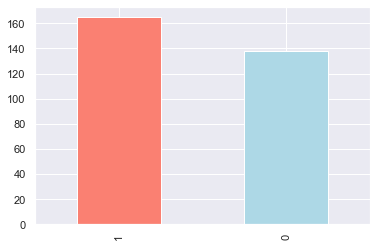

In [336]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])


In [337]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [338]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [339]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [340]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

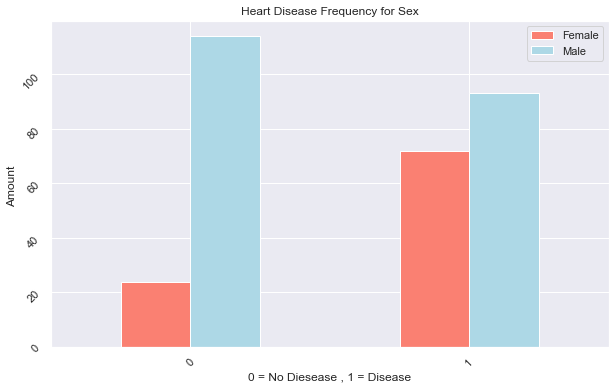

In [341]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])

plt.title( "Heart Disease Frequency for Sex")
plt.xlabel('0 = No Diesease , 1 = Disease')
plt.ylabel ( "Amount " )
plt.legend( [ "Female" ,"Male"] )
plt.xticks(rotation=45)
plt.yticks(rotation = 45)


### Age vs Max Heart Rate for heart disease

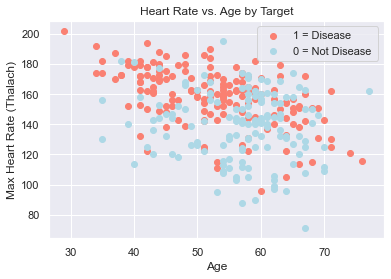

In [342]:
# Scatter plot for 'target' = 1
plt.scatter(df['age'][df['target'] == 1], 
            df['thalach'][df['target'] == 1], 
            c='salmon', 
            label='1 = Disease')

# Scatter plot for 'target' = 0
plt.scatter(df['age'][df['target'] == 0], 
            df['thalach'][df['target'] == 0], 
            c='lightblue', 
            label='0 = Not Disease ')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (Thalach)')
plt.title('Heart Rate vs. Age by Target')
plt.show()


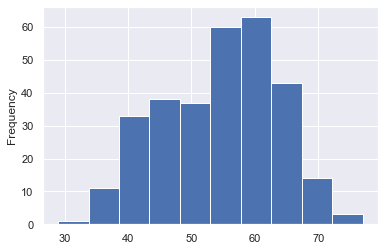

In [343]:
# Check the distribution of the age column with a histogram
df.age.plot.hist( ) ;

# Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type

    0: Typical angina: chest pain related decrease blood supply to the heart
    
    1 : Atypical angina: chest pain not related to heart
    
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    
    3: Asymptomatic: chest pain not showing signs of disease

In [344]:
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


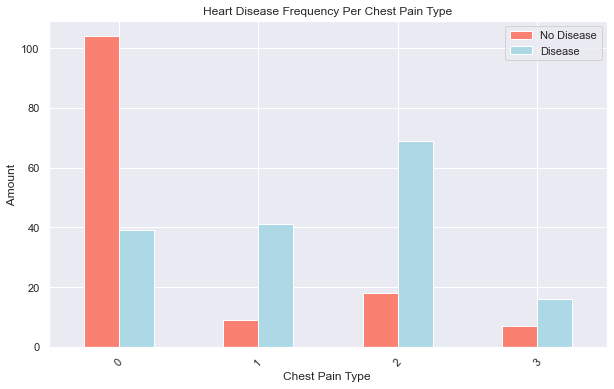

In [345]:

pd.crosstab(df['cp'],df['target']).plot(kind= 'bar',
figsize = (10, 6),
color=["salmon",
"lightblue"])
       
plt.title( "Heart Disease Frequency Per Chest Pain Type" )
plt.xlabel( "Chest Pain Type " )
plt.ylabel( " Amount " )
plt.legend( ["No Disease" ,"Disease"])
plt.xticks ( rotation = 45 ) ;


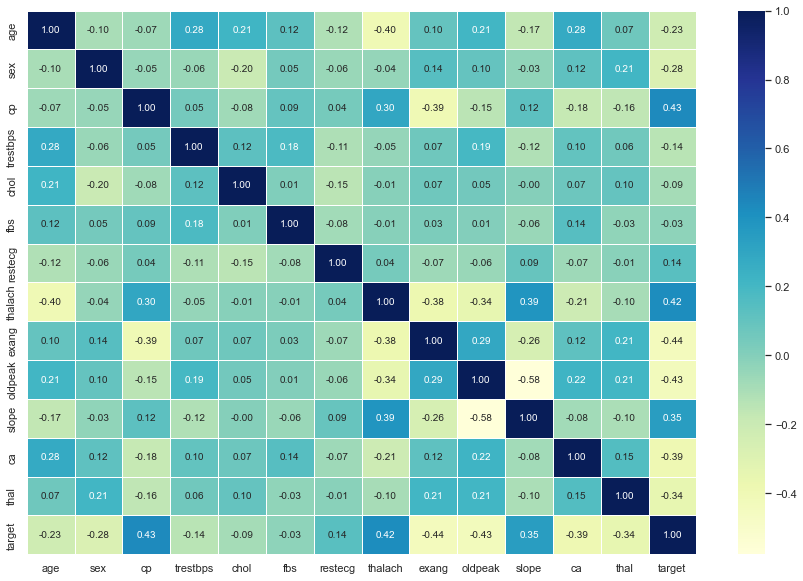

In [346]:
# Let 's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt = ".2f",
                 cmap="YlGnBu"
                 
                )

## 5. Modelling

In [347]:
X = df.iloc[:,1:13] 
# X= df.drop("target",axis = 1)
y = df['target']

X

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1,2,130,250,0,1,187,0,3.5,0,0,2
2,0,1,130,204,0,0,172,0,1.4,2,0,2
3,1,1,120,236,0,1,178,0,0.8,2,0,2
4,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,140,241,0,1,123,1,0.2,1,0,3
299,1,3,110,264,0,1,132,0,1.2,1,0,3
300,1,0,144,193,1,1,141,0,3.4,1,2,3
301,1,0,130,131,0,1,115,1,1.2,1,1,3


In [348]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    X,y ,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=None,
)



In [349]:
X_train

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,1,1,120,295,0,1,162,0,0.0,2,0,2
202,1,0,150,270,0,0,111,1,0.8,2,0,3
196,1,2,150,231,0,1,147,0,3.6,1,0,2
75,0,1,135,250,0,0,161,0,1.4,1,0,2
176,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
188,1,2,140,233,0,1,163,0,0.6,1,1,3
71,1,2,94,227,0,1,154,1,0.0,2,1,3
106,1,3,160,234,1,0,131,0,0.1,1,1,2
270,1,0,120,249,0,0,144,0,0.8,2,0,3


In [350]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we've got our data split into training and test sets ,
it's time to build a machine learning model.
We'll train it (find the patterns) on the training set.
And we'll test it (use the patterns) on the test set.
We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier


In [351]:
models ={
    "logistic Regression" : LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits evaluates given machine learning models
    models: a dict of differetn Scikit—Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    np.random.seed(42)
    model_scores ={}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
        
    return model_scores



In [352]:
model_scores = fit_and_score(
        models = models,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test
)
model_scores




D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic Regression': 0.8688524590163934,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8360655737704918}

<AxesSubplot:>

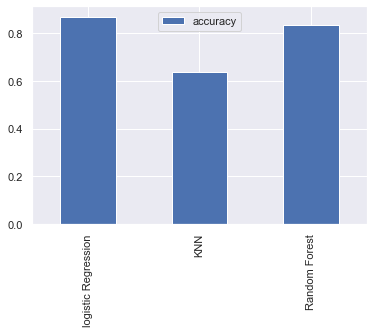

In [353]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar()



Let's look at the following:

* Hyper-parameter tuning
* Feature importance
* Confusion matrix
* Cross—validation
* Precision
* Recall
* Fl score
* Classification report
* ROC curve
* Area under the curve (AUC )

## Hyper-parameter tuning (By Hand)

In [354]:
#KNN 

train_scores = []
test_scores = []
neighbors=range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))


In [355]:
train_scores

[1.0,
 0.7892561983471075,
 0.7768595041322314,
 0.7520661157024794,
 0.743801652892562,
 0.731404958677686,
 0.6900826446280992,
 0.6900826446280992,
 0.6818181818181818,
 0.6859504132231405,
 0.7148760330578512,
 0.6859504132231405,
 0.6859504132231405,
 0.6776859504132231,
 0.6942148760330579,
 0.6859504132231405,
 0.6776859504132231,
 0.6818181818181818,
 0.6694214876033058,
 0.6818181818181818]

In [356]:
test_scores

[0.6229508196721312,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.639344262295082,
 0.6557377049180327,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.6885245901639344,
 0.6229508196721312,
 0.7049180327868853,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.7377049180327869,
 0.7213114754098361]

Maximum KNN score on the test data: 75.41 %


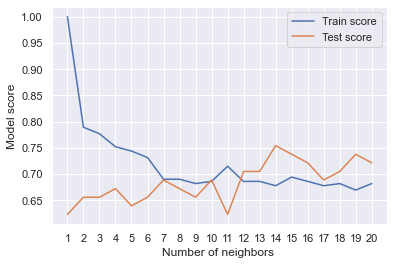

In [357]:
plt.plot(neighbors, train_scores, label = "Train score" )
plt.plot(neighbors, test_scores, label= "Test score" )
plt.xticks(np.arange(1,21,1))
plt.xlabel( "Number of neighbors " )
plt.ylabel( "Model score" )
plt.legend( )
print( f"Maximum KNN score on the test data: {max(test_scores)*100:.2f} %")

## Hyper-parameter tuning (By RandomizedSearchCV)

TO DO:
* Logistic Regression()
* Random Forest()

using RandomizedSearchCV

In [358]:
# Hyperparameter grid for Logistic Regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),  # Regularization strength
    "solver": ["liblinear"]       # Optimization algorithm
}

# Hyperparameter grid for Random Forest
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),      # Number of trees
    "max_depth": [None, 3, 5, 10],               # Maximum depth of trees
    "min_samples_split": np.arange(2, 20, 2),    # Minimum number of samples required to split
    "min_samples_leaf": np.arange(1, 20, 2)      # Minimum number of samples per leaf
}




In [359]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [360]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [361]:
rs_log_reg.best_score_

0.8262755102040817

In [362]:
rs_log_reg.score(X_test,y_test)

0.8524590163934426

In [363]:
#Setup Random Seed(42)
np.random.seed(42)

#Setup hyper-perameter

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [364]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [365]:
rs_rf.best_score_

0.8386054421768707

In [366]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparamter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far,
we'll try and improve them again using GridSearchCV..

In [367]:
log_reg_grid = {"C":np.logspace(-4,4,40),
                "solver":['liblinear']}

gs_log_grid= GridSearchCV(LogisticRegression(),
             param_grid=log_reg_grid,
             cv=5,
             verbose = True)

gs_log_grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [368]:
gs_log_grid.best_estimator_

LogisticRegression(C=34.55107294592218, solver='liblinear')

In [369]:
gs_log_grid.best_score_

0.8262755102040817

In [370]:
gs_log_grid.score(X_test,y_test)

0.8524590163934426

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* Fl—score

and it would be great if cross—validation was used where possible.

To make comparisons and evaluate our trained model,
make predictions first we need to

In [371]:
y_preds = gs_log_grid.predict(X_test)

In [372]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [373]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

# Assuming `gs_log_grid` is your trained GridSearchCV object for logistic regression
best_model = gs_log_grid.best_estimator_  # Get the best trained model

# Plot ROC curve
plot_roc_curve(best_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

# Calculate AUC
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.3f}")


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (D:\Anaconda\lib\site-packages\sklearn\metrics\__init__.py)

AUC Score: 0.928


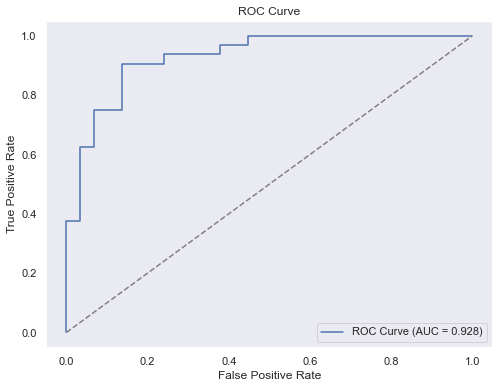

In [375]:
# from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)  # False Positive Rate, True Positive Rate

# Calculate AUC
auc_score = auc(fpr, tpr)
print(f"AUC Score: {auc_score:.3f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [379]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 5 27]]


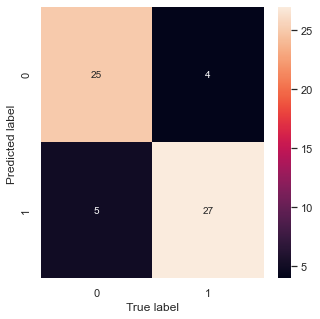

In [384]:
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap( )
    """
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds) ,
                                    annot=True ,
                                    cbar=True)
    plt.xlabel( " True label " )
    plt.ylabel( "Predicted label " )
    
plot_conf_mat(y_test,y_preds)


    

### Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report
as well as cross-validated accurecy, precision, recall and f1 -score.

In [388]:
print (classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [389]:
gs_log_grid.best_params_

{'C': 34.55107294592218, 'solver': 'liblinear'}

In [392]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=34.55107294592218, solver='liblinear') 

In [394]:
#Cross—validated accuracy

cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.80327869, 0.8852459 , 0.83606557, 0.86666667, 0.71666667])

In [396]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8215846994535518

In [397]:
#Cross—validated precision


cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.78378378, 0.90625   , 0.84848485, 0.83783784, 0.71052632])

In [398]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8173765571791888

In [400]:
#Cross—validated recall

cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall


array([0.87878788, 0.87878788, 0.84848485, 0.93939394, 0.81818182])

In [401]:
cv_recall = np.mean(cv_recall)
cv_recall

0.8727272727272727

In [402]:
#Cross—validated f1 —score

cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1


array([0.82857143, 0.89230769, 0.84848485, 0.88571429, 0.76056338])

In [403]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8431283270719891

<AxesSubplot:title={'center':' Cross—validated classification metrics'}>

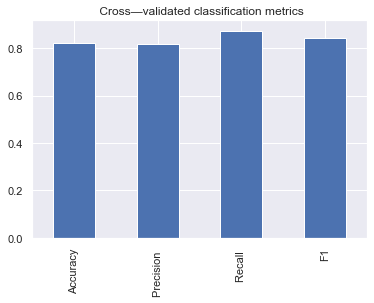

In [409]:
# Visualize cross—validated metrics
cv_metrics = pd.DataFrame({ "Accuracy": cv_acc,
                            "Precision " : cv_precision,
                            "Recall " : cv_recall,
                            "F1" :cv_f1 } ,
                            index=[0])
        
        
cv_metrics.T.plot.bar(title = " Cross—validated classification metrics" ,legend=False )


## Feature Importance

Feature importance is another as asking, "which features contributed
most to the outcomes of the model and how did they contribute? "

Finding feature importance is different for each machine learning
model. 

One way to find feature importance is to search for " (MODEL
NAME) feature importance" .

Let's find the feature importance for our LogisticRegression model...